<a href="https://colab.research.google.com/github/hyejeong14/Digital-Hanaro/blob/main/0609_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EC%8B%A4%EC%8A%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#중간 데이터 저장
전처리 데이터 저장

In [2]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 메뉴 - 런타임 - 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (5,371 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122541 files and di

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

wf = pd.read_csv('/content/drive/MyDrive/Digital_Hana1/data/welfare_2015_0608.csv')

In [2]:
plt.rc('font',family="NanumGothic")

#주제 3 : 연령대에 따른 월급 차이

1. 사용 변수 : 나이(이상치, 결측치 확인), 월급(이상치, 결측치 확인)
2. 변수 검토 및 전처리
3. 나이를 연령대로 변환 
4. 연령대 <br> 
60세 이상 : old <br>
30 ~ 59세 : middle <br>
0 ~ 29세 : young (np.where 사용)

5. 연령대별 월급 평균표 생성
6. 막대 그래프

##데이터 확인

In [3]:
wf['age']

0        80.0
1        71.0
2        68.0
3        74.0
4        93.0
         ... 
16665     NaN
16666    44.0
16667    47.0
16668    56.0
16669    76.0
Name: age, Length: 16670, dtype: float64

In [4]:
wf['age'].value_counts(dropna=False)

74.0     354
77.0     300
76.0     294
78.0     279
69.0     269
        ... 
102.0      1
105.0      1
99.0       1
101.0      1
NaN        1
Name: age, Length: 103, dtype: int64

In [5]:
wf['age'].describe()

count    16669.000000
mean        48.434399
std         24.177789
min          2.000000
25%         28.000000
50%         50.000000
75%         70.000000
max        109.000000
Name: age, dtype: float64

In [6]:
wf['age'].isnull().sum()

1

wf['age'] => 이상치 없음, 결측치 1

In [7]:
wf['income'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16670 entries, 0 to 16669
Series name: income
Non-Null Count  Dtype  
--------------  -----  
4620 non-null   float64
dtypes: float64(1)
memory usage: 130.4 KB


In [8]:
wf['income'].describe()

count    4620.000000
mean      242.351195
std       184.222067
min         0.460000
25%       123.000000
50%       193.000000
75%       316.700000
max      2400.000000
Name: income, dtype: float64

In [9]:
wf['income'].value_counts(dropna=False)

NaN       12050
20.00       136
150.00      128
200.00       91
250.00       74
          ...  
515.00        1
397.18        1
304.16        1
487.50        1
187.66        1
Name: income, Length: 1767, dtype: int64

In [10]:
wf['income'].isnull().sum()

12050

wf['income'] => 결측치 12050개, 이상치 없음

In [11]:
wf['age_bin'] = np.where(wf['age']>=60,'old',
                         np.where((wf['age']>=30)&(wf['age']<60),'middle', #60세 이상 이미 고려했으니까 30세 이상만 고려하면댐
                         np.where((wf['age']<30)&(wf['age']>0),'young',np.nan)))

In [12]:
wf

,Unnamed: 0,sex,birth_year,marital_status,religion,job_code,income,region,age,age_bin
0,0,female,1936.0,2,2,NaN,NaN,1,80.0,old
1,1,female,1945.0,2,2,NaN,NaN,1,71.0,old
2,2,male,1948.0,2,2,942.0,120.0,1,68.0,old
3,3,male,1942.0,3,1,762.0,200.0,1,74.0,old
4,4,female,1923.0,2,1,NaN,NaN,1,93.0,old
...,...,...,...,...,...,...,...,...,...,...
16665,16665,female,NaN,5,1,NaN,NaN,6,NaN,nan
16666,16666,male,1972.0,9,1,NaN,NaN,6,44.0,middle
16667,16667,female,1969.0,1,9,NaN,NaN,2,47.0,middle
16668,16668,female,1960.0,3,2,9999.0,NaN,6,56.0,middle


In [13]:
wf['age_bin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16670 entries, 0 to 16669
Series name: age_bin
Non-Null Count  Dtype 
--------------  ----- 
16670 non-null  object
dtypes: object(1)
memory usage: 130.4+ KB


In [14]:
wf['age_bin'].value_counts(dropna=False)

old       6283
middle    6052
young     4334
nan          1
Name: age_bin, dtype: int64

In [15]:
wf['age_bin'].isnull().sum()

0

In [16]:
wf['age_bin']=np.where(wf['age_bin']=='nan',np.nan,wf['age_bin'])

In [17]:
wf['age_bin'].value_counts(dropna=False)

old       6283
middle    6052
young     4334
NaN          1
Name: age_bin, dtype: int64

In [18]:
wf['age_bin'].isnull().sum()

1

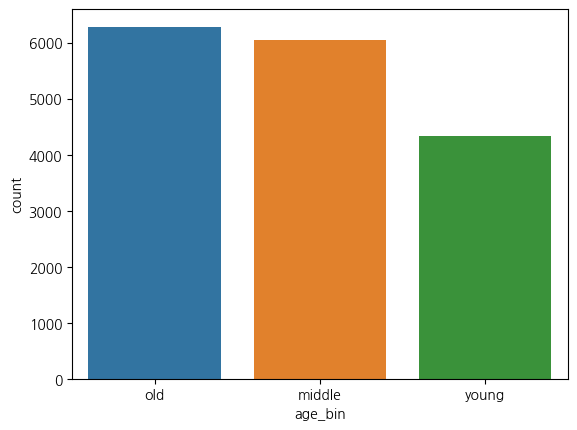

In [19]:
sns.countplot(x='age_bin',data=wf)
plt.show()

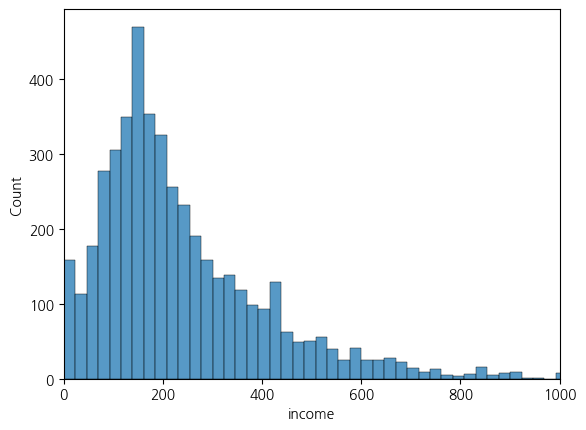

In [20]:
sns.histplot(x='income',data=wf).set(xlim=(0,1000)) #구간 조절
plt.show()

##데이터 분석

In [21]:
wf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16670 entries, 0 to 16669
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      16670 non-null  int64  
 1   sex             16669 non-null  object 
 2   birth_year      16669 non-null  float64
 3   marital_status  16670 non-null  int64  
 4   religion        16670 non-null  int64  
 5   job_code        7530 non-null   float64
 6   income          4620 non-null   float64
 7   region          16670 non-null  int64  
 8   age             16669 non-null  float64
 9   age_bin         16669 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 1.3+ MB


In [22]:
wf_gr = wf.dropna(subset=['age_bin','income']).groupby('age_bin',as_index=False)

In [23]:
wf_bin_income = wf_gr.agg(mean_income=('income','mean'))

##분석 결과

In [24]:
wf_bin_income

,age_bin,mean_income
0,middle,281.887100
1,old,125.329463
2,young,163.595331


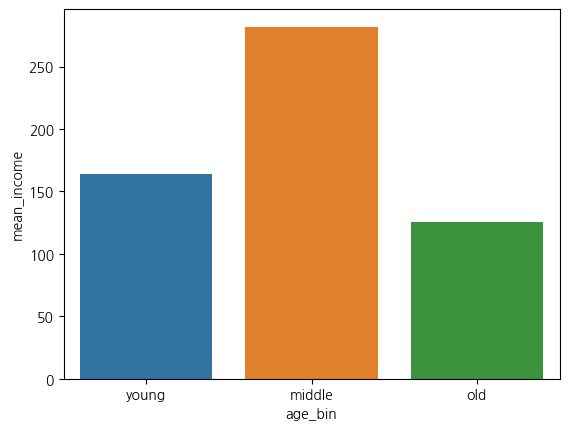

In [25]:
#선 그래프

sns.barplot(x='age_bin',y='mean_income',data=wf_bin_income
            ,order=['young','middle','old'])#그래프 x축 조정

plt.show()

In [26]:
#연령대별 평균월급 차이
print('middle - old : ',wf_bin_income.iloc[0,1]-wf_bin_income.iloc[1,1])
print('middle - young : ',wf_bin_income.iloc[0,1]-wf_bin_income.iloc[2,1])
print('young - old : ',wf_bin_income.iloc[2,1]-wf_bin_income.iloc[1,1])

middle - old :  156.55763727873892
middle - young :  118.29176987126272
young - old :  38.26586740747621


In [27]:
wf_bin_income['mean_income'].max()

281.8871004497751

In [28]:
wf_bin_income['mean_income'].min()

125.3294631710362

In [29]:
wf_bin_income['mean_income'].max()-wf_bin_income['mean_income'].min()

156.55763727873892

# 주제 4 : 연령대 및 성별에 따른 월급 차이

1. group 연령대 별 성별 => 총 6개 그룹 생성
2. 6개 그룹의 평균 월급



---
<br>
** 나이 및 성별에 따른 월급 평균 <br>
1. 나이 => 연속형 변수
2. 선그래프



In [30]:
wf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16670 entries, 0 to 16669
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      16670 non-null  int64  
 1   sex             16669 non-null  object 
 2   birth_year      16669 non-null  float64
 3   marital_status  16670 non-null  int64  
 4   religion        16670 non-null  int64  
 5   job_code        7530 non-null   float64
 6   income          4620 non-null   float64
 7   region          16670 non-null  int64  
 8   age             16669 non-null  float64
 9   age_bin         16669 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 1.3+ MB


In [31]:
wf_gr = wf.dropna(subset=['sex','age_bin','income']).groupby(['age_bin','sex'],as_index=False)
sex_bin_income = wf_gr.agg(mean_income=('income','mean'))
sex_bin_income

,age_bin,sex,mean_income
0,middle,female,187.975522
1,middle,male,353.075741
2,old,female,81.529169
3,old,male,173.855579
4,young,female,159.505178
5,young,male,170.817371


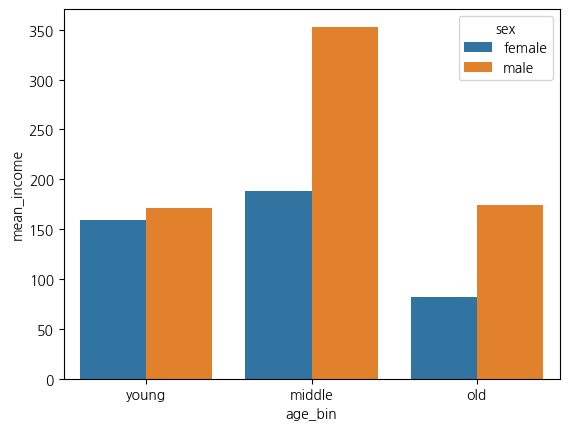

In [32]:
#선 그래프

sns.barplot(x='age_bin',y='mean_income',hue='sex',data=sex_bin_income,order=['young','middle','old'])

plt.show()

In [33]:
young_male=sex_bin_income[(sex_bin_income['age_bin']=='young')&(sex_bin_income['sex']=='male')].mean_income.values
young_female=sex_bin_income[(sex_bin_income['age_bin']=='young')&(sex_bin_income['sex']=='female')].mean_income.values
middle_male=sex_bin_income[(sex_bin_income['age_bin']=='middle')&(sex_bin_income['sex']=='male')].mean_income.values
middle_female=sex_bin_income[(sex_bin_income['age_bin']=='middle')&(sex_bin_income['sex']=='female')].mean_income.values
old_male=sex_bin_income[(sex_bin_income['age_bin']=='old')&(sex_bin_income['sex']=='male')].mean_income.values
old_female=sex_bin_income[(sex_bin_income['age_bin']=='old')&(sex_bin_income['sex']=='female')].mean_income.values

In [34]:
#연령대별 평균월급 차이
print('young(male) - young(female) : ',young_male[0]-young_female[0])
print('middle(male) - middle(female) : ',middle_male[0]-middle_female[0])
print('old(male) - old(female) : ',old_male[0]-old_female[0])

young(male) - young(female) :  11.312193435043923
middle(male) - middle(female) :  165.1002190854017
old(male) - old(female) :  92.32641030128764


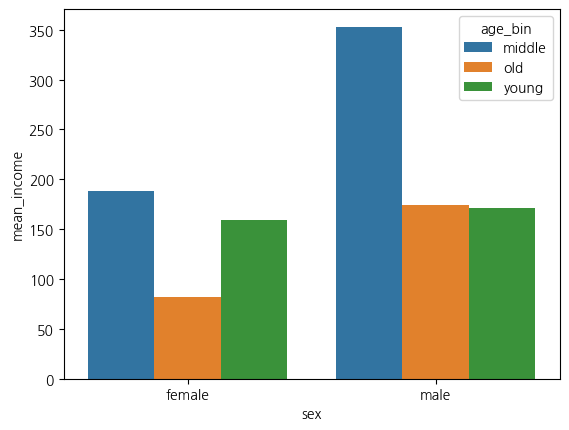

In [35]:
#막대 그래프

sns.barplot(x='sex',y='mean_income',hue='age_bin',data=sex_bin_income)

plt.show()

In [36]:
#성별 - 연령대
print("male")
print(" ")
print('middle(male) - old(male)) : ',middle_male[0]-old_male[0])
print('middle(male) - young(male) : ',middle_male[0]-young_male[0])
print('old(male) - young(male) : ',old_male[0]-young_male[0])

print(" ")
print("-"*20)
print(" ")

print("female")
print(" ")
print('middle(female) - old(female)) : ',middle_female[0]-old_female[0])
print('middle(female) - young(female) : ',middle_female[0]-young_female[0])
print('young(female) - old(female) : ',young_female[0]-old_female[0])

male
 
middle(male) - old(male)) :  179.22016169575235
middle(male) - young(male) :  182.25836921454933
old(male) - young(male) :  3.0382075187969804
 
--------------------
 
female
 
middle(female) - old(female)) :  106.44635291163829
middle(female) - young(female) :  28.470343564191552
young(female) - old(female) :  77.97600934744673


##나이 및 성별에 따른 월급 차이

In [37]:
wf_gr = wf.dropna(subset=['sex','age','income']).groupby(['age','sex'],as_index=False)
sex_age_income = wf_gr.agg(mean_income=('income','mean'))
sex_age_income

,age,sex,mean_income
0,20.0,female,147.450000
1,20.0,male,69.000000
2,21.0,female,106.978947
3,21.0,male,102.050000
4,22.0,female,139.854706
...,...,...,...
129,84.0,male,22.500000
130,85.0,female,20.000000
131,87.0,female,20.000000
132,88.0,female,15.000000


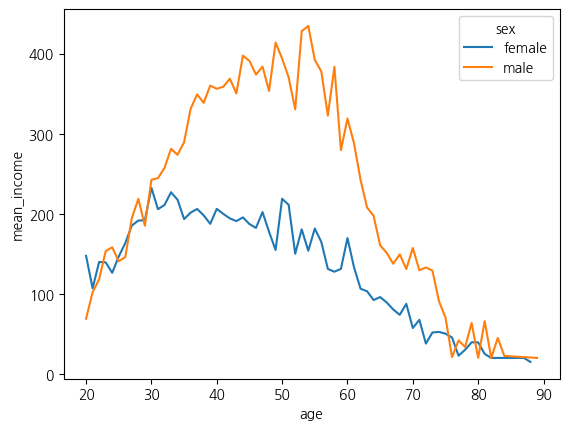

In [38]:
#선 그래프
sns.lineplot(x='age',y='mean_income',hue='sex',data=sex_age_income)
plt.show()

In [39]:
sex_age_income.mean_income.max()

434.48900000000003

In [40]:
sex_age_income[sex_age_income.mean_income==sex_age_income.mean_income.max()]

,age,sex,mean_income
69,54.0,male,434.489


#주제 5 : 직업에 따른 월급 차이

1. 사용 변수 : 직종 코드 ( 코드북 직종코드 참조 ), 월급 <br>
직종 코드 -> 직종 이름 merge 이용하여 데이터 합치기 (직종코드 기준으로 join하기 )
2. 변수 확인 : 자료형 확인, 이상치 및 결측치 확인
3. 전처리 : 필요시 자료형 변환, 이상치 및 결측치 처리
4. 직업별 월급 평균표 작성
5. 상위 10개, 하위 10개 뽑아서 2개의 수평막대그래프 그리기


##데이터 확인

In [41]:
wf.drop('Unnamed: 0',axis=1,inplace=True)

In [42]:
wf['job_code'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16670 entries, 0 to 16669
Series name: job_code
Non-Null Count  Dtype  
--------------  -----  
7530 non-null   float64
dtypes: float64(1)
memory usage: 130.4 KB


In [43]:
wf['job_code'].value_counts(dropna=False)

NaN       9140
611.0     1320
521.0      353
941.0      325
930.0      289
          ... 
881.0        2
620.0        2
1011.0       2
812.0        1
9999.0       1
Name: job_code, Length: 147, dtype: int64

In [44]:
wf['job_code'].isnull().sum()

9140

In [45]:
codebook=pd.read_excel('/content/drive/MyDrive/Digital_Hana1/data/welfare_2015_codebook.xlsx',sheet_name='직종코드',engine='openpyxl')
codebook
#codebook[codebook['job_code']==942]

,job_code,job
0,111,의회의원 고위공무원 및 공공단체임원
1,112,기업고위임원
2,120,행정 및 경영지원 관리자
3,131,연구 교육 및 법률 관련 관리자
4,132,보험 및 금융 관리자
...,...,...
144,991,농립어업관련 단순 종사원
145,992,계기검침 수금 및 주차 관련 종사원
146,999,기타 서비스관련 단순 종사원
147,1011,장교


In [46]:
wf_job=pd.merge(wf,codebook)
wf_job

,sex,birth_year,marital_status,religion,job_code,income,region,age,age_bin,job
0,male,1948.0,2,2,942.0,120.0,1,68.0,old,경비원 및 검표원
1,male,1945.0,3,2,942.0,220.2,1,71.0,old,경비원 및 검표원
2,male,1946.0,1,2,942.0,139.0,1,70.0,old,경비원 및 검표원
3,male,1953.0,1,2,942.0,150.0,1,63.0,old,경비원 및 검표원
4,male,1960.0,1,1,942.0,166.0,1,56.0,middle,경비원 및 검표원
...,...,...,...,...,...,...,...,...,...,...
7524,female,1950.0,1,1,819.0,NaN,6,66.0,old,기타 식품가공관련 기계조작원
7525,male,1960.0,1,1,111.0,250.0,7,56.0,middle,의회의원 고위공무원 및 공공단체임원
7526,male,1960.0,1,2,111.0,1250.0,1,56.0,middle,의회의원 고위공무원 및 공공단체임원
7527,male,1992.0,5,1,876.0,280.0,3,24.0,young,선박 갑판승무원 및 관련 종사원


In [47]:
wf=pd.merge(wf,codebook,how='left',on='job_code')

In [48]:
wf_job['job'].value_counts(dropna=False)

작물재배 종사자             1320
매장 판매 종사자             353
청소원 및 환경 미화원          325
제조관련 단순 종사원           289
경영관련 사무원              260
                     ... 
항공기 선박 기관사 및 관제사        2
임업관련 종사자                2
장교                      2
선박 갑판승무원 및 관련 종사원       2
음료제조관련 기계조작원            1
Name: job, Length: 145, dtype: int64

##데이터 분석

In [49]:
wf_job.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7529 entries, 0 to 7528
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             7529 non-null   object 
 1   birth_year      7529 non-null   float64
 2   marital_status  7529 non-null   int64  
 3   religion        7529 non-null   int64  
 4   job_code        7529 non-null   float64
 5   income          4620 non-null   float64
 6   region          7529 non-null   int64  
 7   age             7529 non-null   float64
 8   age_bin         7529 non-null   object 
 9   job             7529 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 647.0+ KB


In [50]:
wf_gr = wf_job.dropna(subset=['job','income']).groupby(['job'],as_index=False)
job_income = wf_gr.agg(mean_income=('income','mean'))
job_income

,job,mean_income
0,가사 및 육아 도우미,80.166484
1,간호사,240.681270
2,건설 및 광업 단순 종사원,190.129744
3,건설 및 채굴 기계운전원,357.970000
4,건설 전기 및 생산 관련 관리자,535.805556
...,...,...
137,화학 고무 및 플라스틱 제품 생산기 조작원,303.221176
138,화학공학 기술자 및 시험원,527.680000
139,환경 청소 및 경비 관련 관리자,219.246154
140,환경공학 기술자 및 시험원,332.575000


In [51]:
job_income_sort=job_income.sort_values(by='mean_income',ascending=False)
job_income_sort

,job,mean_income
17,금속 재료 공학 기술자 및 시험원,845.066667
89,의료진료 전문가,843.642857
91,의회의원 고위공무원 및 공공단체임원,750.000000
54,보험 및 금융 관리자,726.180000
114,제관원 및 판금원,572.406667
...,...,...
72,약사 및 한약사,89.000000
122,청소원 및 환경 미화원,88.787747
29,기타 서비스관련 단순 종사원,88.221010
96,임업관련 종사자,83.330000


In [52]:
top_10=job_income_sort.head(10)
top_10

,job,mean_income
17,금속 재료 공학 기술자 및 시험원,845.066667
89,의료진료 전문가,843.642857
91,의회의원 고위공무원 및 공공단체임원,750.000000
54,보험 및 금융 관리자,726.180000
114,제관원 및 판금원,572.406667
133,행정 및 경영지원 관리자,563.763333
44,문화 예술 디자인 및 영상 관련 관리자,557.466667
75,연구 교육 및 법률 관련 관리자,549.912500
4,건설 전기 및 생산 관련 관리자,535.805556
63,석유 및 화학물 가공장치 조작원,531.660000


In [53]:
low_10=job_income_sort.tail(10)
low_10

,job,mean_income
129,판매관련 단순 종사원,116.822034
86,음식관련 단순 종사원,107.845109
88,의료 복지 관련 서비스 종사자,103.526435
35,농립어업관련 단순 종사원,101.581250
101,작물재배 종사자,92.000000
72,약사 및 한약사,89.000000
122,청소원 및 환경 미화원,88.787747
29,기타 서비스관련 단순 종사원,88.221010
96,임업관련 종사자,83.330000
0,가사 및 육아 도우미,80.166484


##분석 결과

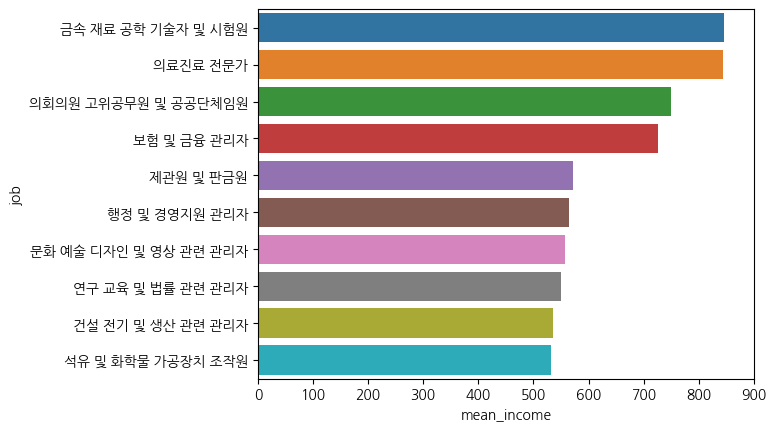

In [54]:
#수평막대 그래프

sns.barplot(x='mean_income',y='job',data=top_10,orient='h').set(xlim=(0,900)) #orient 옵션 빼고 x,y만 바꿔도 수평막대 그래프가 그려짐

plt.show()

In [55]:
low_10=low_10.sort_values(by='mean_income')

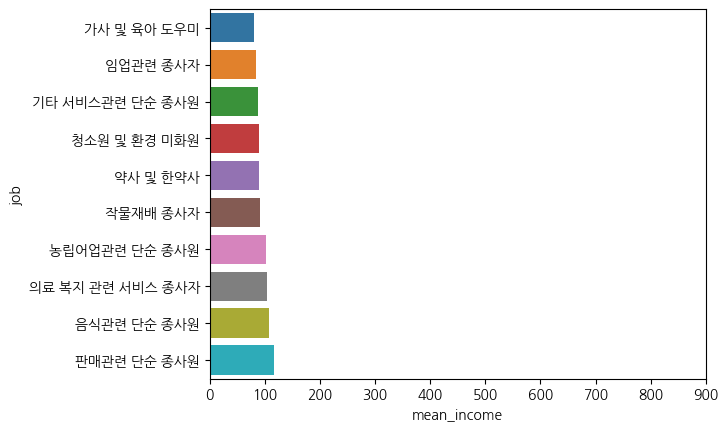

In [56]:
#수평막대 그래프

sns.barplot(x='mean_income',y='job',data=low_10).set(xlim=(0,900))

plt.show()

#주제 6 : 성별 직업 빈도
성별에 따라 어떤 직업이 가장 많은지
<br>
<br>
1. 사용 변수 : 성별(남,여), 직업(이름)에 따른 빈도 => agg:count
2. 성별로 그룹화
3. 수평 막대 그래프

##데이터 확인

In [57]:
wf

,sex,birth_year,marital_status,religion,job_code,income,region,age,age_bin,job
0,female,1936.0,2,2,NaN,NaN,1,80.0,old,NaN
1,female,1945.0,2,2,NaN,NaN,1,71.0,old,NaN
2,male,1948.0,2,2,942.0,120.0,1,68.0,old,경비원 및 검표원
3,male,1942.0,3,1,762.0,200.0,1,74.0,old,전기공
4,female,1923.0,2,1,NaN,NaN,1,93.0,old,NaN
...,...,...,...,...,...,...,...,...,...,...
16665,female,NaN,5,1,NaN,NaN,6,NaN,NaN,NaN
16666,male,1972.0,9,1,NaN,NaN,6,44.0,middle,NaN
16667,female,1969.0,1,9,NaN,NaN,2,47.0,middle,NaN
16668,female,1960.0,3,2,9999.0,NaN,6,56.0,middle,NaN


In [58]:
wf['sex'].info()

<class 'pandas.core.series.Series'>
Int64Index: 16670 entries, 0 to 16669
Series name: sex
Non-Null Count  Dtype 
--------------  ----- 
16669 non-null  object
dtypes: object(1)
memory usage: 260.5+ KB


In [59]:
wf['sex'].value_counts(dropna=False)

female    9089
male      7580
NaN          1
Name: sex, dtype: int64

In [60]:
wf['sex'].isnull().sum()

1

In [61]:
wf['job'].info()

<class 'pandas.core.series.Series'>
Int64Index: 16670 entries, 0 to 16669
Series name: job
Non-Null Count  Dtype 
--------------  ----- 
7529 non-null   object
dtypes: object(1)
memory usage: 260.5+ KB


In [62]:
wf['job'].value_counts(dropna=False)

NaN                  9141
작물재배 종사자             1320
매장 판매 종사자             353
청소원 및 환경 미화원          325
제조관련 단순 종사원           289
                     ... 
항공기 선박 기관사 및 관제사        2
임업관련 종사자                2
장교                      2
선박 갑판승무원 및 관련 종사원       2
음료제조관련 기계조작원            1
Name: job, Length: 146, dtype: int64

In [63]:
wf['job'].isnull().sum()

9141

In [64]:
#남녀 성별에 따른 직업 빈도

##데이터 분석

In [65]:
wf_gr = wf.dropna(subset=['job','sex']).groupby(['sex','job'],as_index=False)

In [66]:
wf_sex_job = wf_gr.agg(count_job=('job','count'))
wf_sex_job

,sex,job,count_job
0,female,가사 및 육아 도우미,125
1,female,간호사,58
2,female,건설 및 광업 단순 종사원,7
3,female,건설구조관련 기능 종사자,1
4,female,건축 및 토목 공학 기술자 및 시험원,2
...,...,...,...
240,male,화학 고무 및 플라스틱 제품 생산기 조작원,14
241,male,화학공학 기술자 및 시험원,5
242,male,환경 청소 및 경비 관련 관리자,12
243,male,환경공학 기술자 및 시험원,6


In [67]:
sj_sort_male = wf_sex_job[wf_sex_job['sex']=='male'].sort_values(by='count_job',ascending=False)
sj_sort_male

,sex,job,count_job
204,male,작물재배 종사자,640
201,male,자동차 운전원,251
113,male,경영관련 사무원,213
183,male,영업 종사자,141
144,male,매장 판매 종사자,132
...,...,...,...
205,male,장교,2
229,male,통계관련 사무원,2
133,male,기타 식품가공관련 기계조작원,2
162,male,상 하수도 처리장치 조작원,2


In [68]:
top10_male = sj_sort_male.head(10)
top10_male

,sex,job,count_job
204,male,작물재배 종사자,640
201,male,자동차 운전원,251
113,male,경영관련 사무원,213
183,male,영업 종사자,141
144,male,매장 판매 종사자,132
218,male,제조관련 단순 종사원,104
225,male,청소원 및 환경 미화원,97
112,male,경비원 및 검표원,95
105,male,건설 및 광업 단순 종사원,95
237,male,행정 사무원,92


In [69]:
sj_sort_female = wf_sex_job[wf_sex_job['sex']=='female'].sort_values(by='count_job',ascending=False)
sj_sort_female

,sex,job,count_job
76,female,작물재배 종사자,680
90,female,청소원 및 환경 미화원,228
31,female,매장 판매 종사자,221
85,female,제조관련 단순 종사원,185
103,female,회계 및 경리 사무원,176
...,...,...,...
71,female,인문 및 사회 과학 전문가,1
77,female,장기 부사관 및 준위,1
3,female,건설구조관련 기능 종사자,1
81,female,전기공,1


In [70]:
top10_female=sj_sort_female.head(10)
top10_female

,sex,job,count_job
76,female,작물재배 종사자,680
90,female,청소원 및 환경 미화원,228
31,female,매장 판매 종사자,221
85,female,제조관련 단순 종사원,185
103,female,회계 및 경리 사무원,176
66,female,음식서비스 종사자,149
87,female,주방장 및 조리사,126
0,female,가사 및 육아 도우미,125
67,female,의료 복지 관련 서비스 종사자,121
65,female,음식관련 단순 종사원,104


##분석 결과

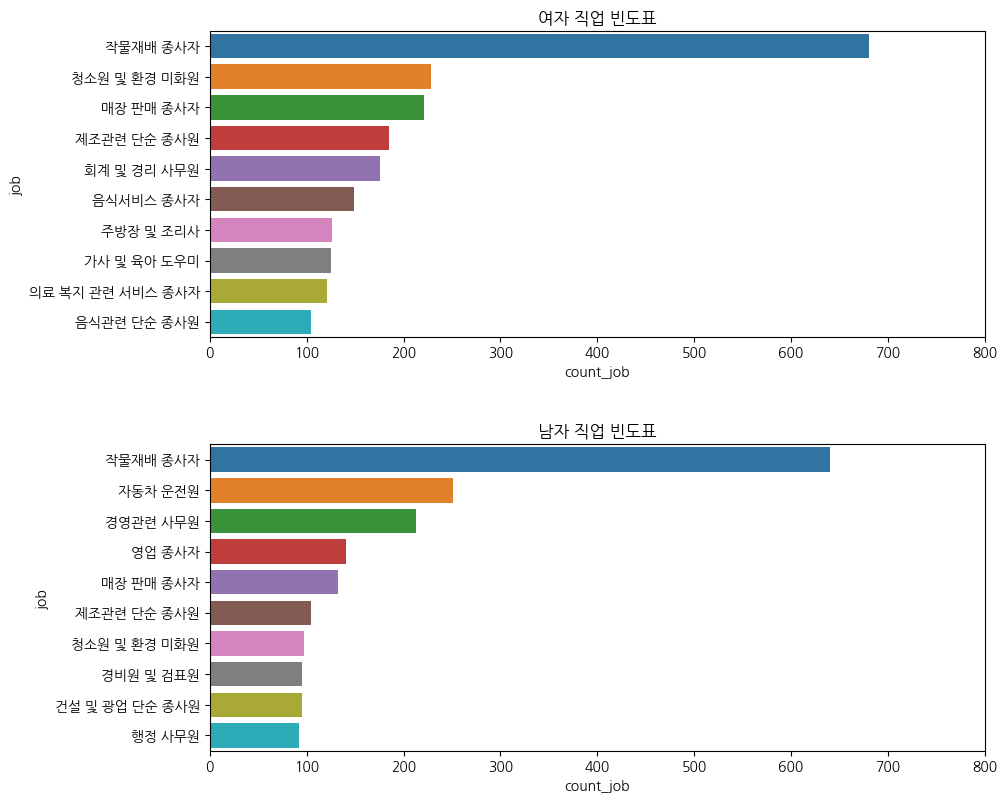

In [71]:
#수평막대 그래프


#그래프 객체 생성
fig = plt.figure(figsize=(10,9))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

#그래프 생성
sns.barplot(x = 'count_job', y='job',data=top10_female, ax = ax1).set(xlim=(0,800),title='여자 직업 빈도표')
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
sns.barplot(x = 'count_job', y='job',data=top10_male, ax = ax2).set(xlim=(0,800),title='남자 직업 빈도표')

plt.show()


▲ 위의 코드 한 번에 쓰기
```
# 남성 데이터
job_male = welfare[welfare['sex'] == 'male'] \
            .dropna(subset=['sex','job']) \
            .groupby('job', as_index=False) \
            .agg(n = ('job', 'count')) \
            .sort_values('n', ascending=False) \
            .head(10)
job_male
```



# 주제 7 : 종교 유무에 따른 이혼율

1. 사용 변수 : 종교(religion), 혼인상태(marital status)<br>

2. 변수 확인 : 자료형 확인, 이상치 및 결측치 확인 (ex. 9999,NaN)<br>

3. 조작적 정의
  - 혼인상태 코드 : 유배우 1번, 이혼 3번 => 이외 모두 NaN 변환하기<br>
  - 유배우(marriage), 이혼(divorce) 묶어서 새로운 변수 생성<br>
  - 부분합 만들기 : 이혼율 (이혼/결혼+이혼)*100
  - 종교 유무에 따른 이혼율 확인


##데이터 확인 및 변환

In [72]:
wf

,sex,birth_year,marital_status,religion,job_code,income,region,age,age_bin,job
0,female,1936.0,2,2,NaN,NaN,1,80.0,old,NaN
1,female,1945.0,2,2,NaN,NaN,1,71.0,old,NaN
2,male,1948.0,2,2,942.0,120.0,1,68.0,old,경비원 및 검표원
3,male,1942.0,3,1,762.0,200.0,1,74.0,old,전기공
4,female,1923.0,2,1,NaN,NaN,1,93.0,old,NaN
...,...,...,...,...,...,...,...,...,...,...
16665,female,NaN,5,1,NaN,NaN,6,NaN,NaN,NaN
16666,male,1972.0,9,1,NaN,NaN,6,44.0,middle,NaN
16667,female,1969.0,1,9,NaN,NaN,2,47.0,middle,NaN
16668,female,1960.0,3,2,9999.0,NaN,6,56.0,middle,NaN


In [73]:
wf['religion'].info()

<class 'pandas.core.series.Series'>
Int64Index: 16670 entries, 0 to 16669
Series name: religion
Non-Null Count  Dtype
--------------  -----
16670 non-null  int64
dtypes: int64(1)
memory usage: 260.5 KB


In [74]:
wf['religion'].value_counts(dropna=False)

2    8619
1    8050
9       1
Name: religion, dtype: int64

In [75]:
wf['religion'].isnull().sum()

0

In [76]:
wf['religion']=np.where(wf['religion']==1,'Y',
                        np.where(wf['religion']==2,'N',np.nan))

wf

,sex,birth_year,marital_status,religion,job_code,income,region,age,age_bin,job
0,female,1936.0,2,N,NaN,NaN,1,80.0,old,NaN
1,female,1945.0,2,N,NaN,NaN,1,71.0,old,NaN
2,male,1948.0,2,N,942.0,120.0,1,68.0,old,경비원 및 검표원
3,male,1942.0,3,Y,762.0,200.0,1,74.0,old,전기공
4,female,1923.0,2,Y,NaN,NaN,1,93.0,old,NaN
...,...,...,...,...,...,...,...,...,...,...
16665,female,NaN,5,Y,NaN,NaN,6,NaN,NaN,NaN
16666,male,1972.0,9,Y,NaN,NaN,6,44.0,middle,NaN
16667,female,1969.0,1,nan,NaN,NaN,2,47.0,middle,NaN
16668,female,1960.0,3,N,9999.0,NaN,6,56.0,middle,NaN


In [77]:
wf['religion'].info()

<class 'pandas.core.series.Series'>
Int64Index: 16670 entries, 0 to 16669
Series name: religion
Non-Null Count  Dtype 
--------------  ----- 
16670 non-null  object
dtypes: object(1)
memory usage: 260.5+ KB


In [78]:
wf['religion'].value_counts(dropna=False)

N      8619
Y      8050
nan       1
Name: religion, dtype: int64

In [79]:
wf['religion']=np.where(wf['religion']=='nan',np.nan,wf['religion'])

In [80]:
wf['religion'].value_counts(dropna=False)

N      8619
Y      8050
NaN       1
Name: religion, dtype: int64

In [81]:
wf['religion'].isnull().sum()

1

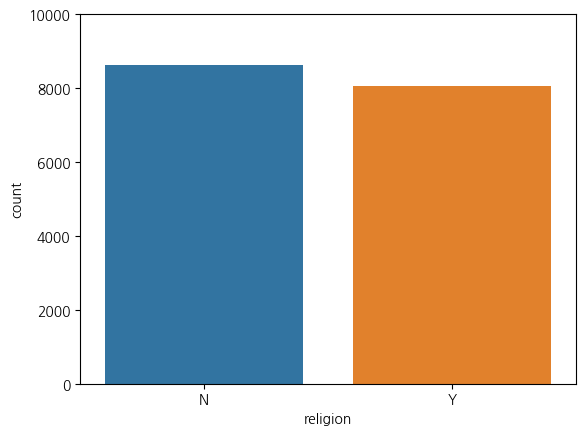

In [82]:
sns.countplot(x='religion',data=wf).set(ylim=(0,10000))
plt.show()

In [83]:
wf['marital_status'].value_counts()

1    8433
0    2861
5    2434
2    2118
3     713
4      84
6      26
9       1
Name: marital_status, dtype: int64

In [84]:
wf['marital_status']=np.where(wf['marital_status']==9,np.nan,wf['marital_status'])
wf['marital_status'].value_counts()

1.0    8433
0.0    2861
5.0    2434
2.0    2118
3.0     713
4.0      84
6.0      26
Name: marital_status, dtype: int64

###이혼 여부 변수 만들기

In [85]:
wf['divorce_status']=np.where(wf['marital_status']==1,'marriage',
                              np.where(wf['marital_status']==3,'divorce',np.nan))
wf

,sex,birth_year,marital_status,religion,job_code,income,region,age,age_bin,job,divorce_status
0,female,1936.0,2.0,N,NaN,NaN,1,80.0,old,NaN,nan
1,female,1945.0,2.0,N,NaN,NaN,1,71.0,old,NaN,nan
2,male,1948.0,2.0,N,942.0,120.0,1,68.0,old,경비원 및 검표원,nan
3,male,1942.0,3.0,Y,762.0,200.0,1,74.0,old,전기공,divorce
4,female,1923.0,2.0,Y,NaN,NaN,1,93.0,old,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...
16665,female,NaN,5.0,Y,NaN,NaN,6,NaN,NaN,NaN,nan
16666,male,1972.0,NaN,Y,NaN,NaN,6,44.0,middle,NaN,nan
16667,female,1969.0,1.0,NaN,NaN,NaN,2,47.0,middle,NaN,marriage
16668,female,1960.0,3.0,N,9999.0,NaN,6,56.0,middle,NaN,divorce


In [86]:
wf['divorce_status'].info()

<class 'pandas.core.series.Series'>
Int64Index: 16670 entries, 0 to 16669
Series name: divorce_status
Non-Null Count  Dtype 
--------------  ----- 
16670 non-null  object
dtypes: object(1)
memory usage: 260.5+ KB


In [87]:
wf['divorce_status'].value_counts(dropna=False)

marriage    8433
nan         7524
divorce      713
Name: divorce_status, dtype: int64

In [88]:
wf['divorce_status']=np.where(wf['divorce_status']=='nan',np.nan,wf['divorce_status'])
wf

,sex,birth_year,marital_status,religion,job_code,income,region,age,age_bin,job,divorce_status
0,female,1936.0,2.0,N,NaN,NaN,1,80.0,old,NaN,NaN
1,female,1945.0,2.0,N,NaN,NaN,1,71.0,old,NaN,NaN
2,male,1948.0,2.0,N,942.0,120.0,1,68.0,old,경비원 및 검표원,NaN
3,male,1942.0,3.0,Y,762.0,200.0,1,74.0,old,전기공,divorce
4,female,1923.0,2.0,Y,NaN,NaN,1,93.0,old,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16665,female,NaN,5.0,Y,NaN,NaN,6,NaN,NaN,NaN,NaN
16666,male,1972.0,NaN,Y,NaN,NaN,6,44.0,middle,NaN,NaN
16667,female,1969.0,1.0,NaN,NaN,NaN,2,47.0,middle,NaN,marriage
16668,female,1960.0,3.0,N,9999.0,NaN,6,56.0,middle,NaN,divorce


In [89]:
wf['divorce_status'].value_counts(dropna=False)

marriage    8433
NaN         7524
divorce      713
Name: divorce_status, dtype: int64

In [90]:
wf['divorce_status'].isnull().sum()

7524

##데이터 분석

In [91]:
wf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16670 entries, 0 to 16669
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             16669 non-null  object 
 1   birth_year      16669 non-null  float64
 2   marital_status  16669 non-null  float64
 3   religion        16669 non-null  object 
 4   job_code        7530 non-null   float64
 5   income          4620 non-null   float64
 6   region          16670 non-null  int64  
 7   age             16669 non-null  float64
 8   age_bin         16669 non-null  object 
 9   job             7529 non-null   object 
 10  divorce_status  9146 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [92]:
wf_gr = wf.dropna(subset=['religion','divorce_status']).groupby(['religion','divorce_status'],as_index=False)
count_divorce = wf_gr.agg(divorce_count=('divorce_status','count'))
count_divorce

,religion,divorce_status,divorce_count
0,N,divorce,385
1,N,marriage,4218
2,Y,divorce,328
3,Y,marriage,4214


In [93]:
religion_n_d=count_divorce[(count_divorce['religion']=='N')&(count_divorce['divorce_status']=='divorce')].divorce_count.values[0]
religion_n_m=count_divorce[(count_divorce['religion']=='N')&(count_divorce['divorce_status']=='marriage')].divorce_count.values[0]
religion_y_d=count_divorce[(count_divorce['religion']=='Y')&(count_divorce['divorce_status']=='divorce')].divorce_count.values[0]
religion_y_m=count_divorce[(count_divorce['religion']=='Y')&(count_divorce['divorce_status']=='marriage')].divorce_count.values[0]

for i in range(len(count_divorce)):
  if count_divorce.iloc[i,:]['religion']=='N':
    count_divorce.loc[i,'divorce_rate']=((religion_n_d)/(religion_n_m+religion_n_d))*100
  else:
    count_divorce.loc[i,'divorce_rate']=((religion_y_d)/(religion_y_m+religion_y_d))*100

count_divorce

,religion,divorce_status,divorce_count,divorce_rate
0,N,divorce,385,8.364110
1,N,marriage,4218,8.364110
2,Y,divorce,328,7.221488
3,Y,marriage,4214,7.221488


In [94]:
wf_gr = count_divorce.groupby(['religion','divorce_rate'],as_index=False).agg('mean').drop('divorce_count',axis=1)
wf_gr

<ipython-input-94-b662c3579947>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wf_gr = count_divorce.groupby(['religion','divorce_rate'],as_index=False).agg('mean').drop('divorce_count',axis=1)


,religion,divorce_rate
0,N,8.364110
1,Y,7.221488


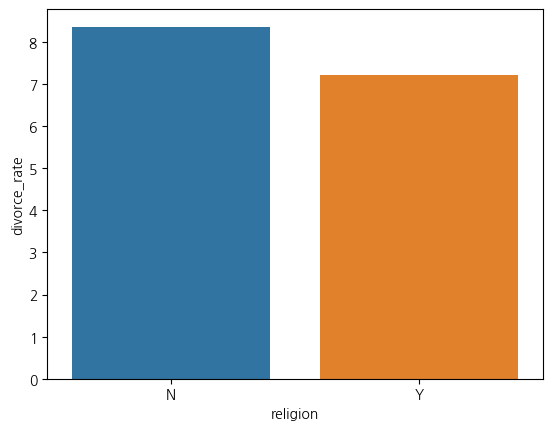

In [95]:
sns.barplot(x='religion',y='divorce_rate',data=wf_gr)
plt.show()

▲ 이혼율 구하는 코드

In [96]:
a= wf.dropna(subset=['religion','divorce_status'])\
  .groupby(['religion'],as_index=False)['divorce_status']

for i,j in a:
  print("i : ",i)
  print(j)

i :  N
11       marriage
12       marriage
16       marriage
17       marriage
19       marriage
           ...   
16652    marriage
16654    marriage
16656    marriage
16657    marriage
16668     divorce
Name: divorce_status, Length: 4603, dtype: object
i :  Y
3         divorce
5        marriage
6        marriage
8        marriage
9        marriage
           ...   
16650    marriage
16655    marriage
16658    marriage
16659    marriage
16669    marriage
Name: divorce_status, Length: 4542, dtype: object


In [97]:
#부분합 구하는 코드

from unicodedata import normalize
divorce_rate = wf.dropna(subset=['religion','divorce_status'])\
                 .groupby(['religion'],as_index=False)['divorce_status']\
                 .value_counts(normalize = True) #normalize=True : class별 비율 계산

divorce_rate

,religion,divorce_status,proportion
0,N,marriage,0.916359
1,N,divorce,0.083641
2,Y,marriage,0.927785
3,Y,divorce,0.072215


In [98]:
dv_rate=divorce_rate[divorce_rate['divorce_status']=='divorce'].assign(proportion=divorce_rate['proportion']*100).round(2)

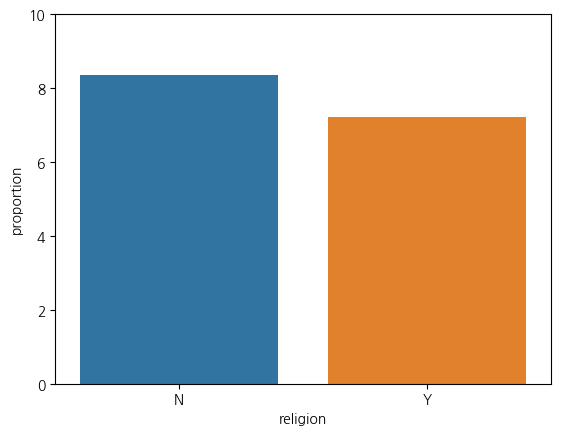

In [99]:
sns.barplot(x='religion',y='proportion',data=dv_rate).set(ylim=(0,10))
plt.show()

###연령대 및 종교 유무에 따른 이혼율 차이

연령대에 따른 이혼율

In [100]:
wf.dropna(subset=['age_bin','divorce_status'])\
  .groupby(['age_bin'],as_index=False)['divorce_status']\
  .value_counts()

,age_bin,divorce_status,count
0,middle,marriage,4482
1,middle,divorce,438
2,old,marriage,3893
3,old,divorce,273
4,young,marriage,58
5,young,divorce,2


In [101]:
age_group_div = wf.dropna(subset=['age_bin','divorce_status'])\
                  .groupby(['age_bin'],as_index=False)['divorce_status']\
                  .value_counts(normalize=True) #normalize=True : class별 비율 계산

age_group_div

,age_bin,divorce_status,proportion
0,middle,marriage,0.910976
1,middle,divorce,0.089024
2,old,marriage,0.934470
3,old,divorce,0.065530
4,young,marriage,0.966667
5,young,divorce,0.033333


In [102]:
age_group_div[age_group_div['age_bin'] != 'young']

,age_bin,divorce_status,proportion
0,middle,marriage,0.910976
1,middle,divorce,0.089024
2,old,marriage,0.934470
3,old,divorce,0.065530


In [103]:
# 이혼율 데이터
age_group_div = age_group_div[(age_group_div['divorce_status'] == 'divorce') &
                             (age_group_div['age_bin'] != 'young')] \
                             .assign(proportion = age_group_div['proportion'] * 100) \
                             .round(2)

age_group_div

,age_bin,divorce_status,proportion
1,middle,divorce,8.90
3,old,divorce,6.55


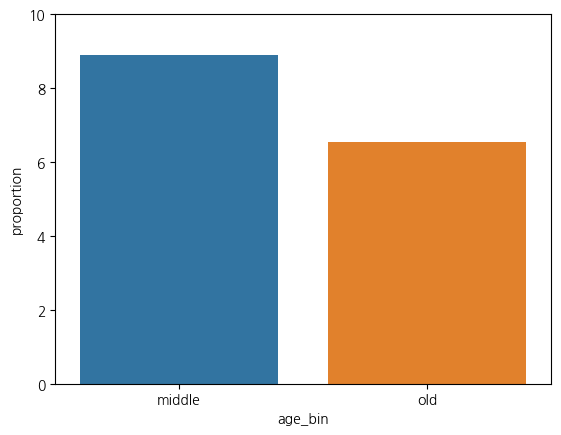

In [104]:
sns.barplot(x='age_bin',y='proportion',data=age_group_div).set(ylim=(0,10))
plt.show()

연령대+종교 유무에 따른 이혼율

In [105]:
wf[wf['age_bin']!='young']

,sex,birth_year,marital_status,religion,job_code,income,region,age,age_bin,job,divorce_status
0,female,1936.0,2.0,N,NaN,NaN,1,80.0,old,NaN,NaN
1,female,1945.0,2.0,N,NaN,NaN,1,71.0,old,NaN,NaN
2,male,1948.0,2.0,N,942.0,120.0,1,68.0,old,경비원 및 검표원,NaN
3,male,1942.0,3.0,Y,762.0,200.0,1,74.0,old,전기공,divorce
4,female,1923.0,2.0,Y,NaN,NaN,1,93.0,old,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16665,female,NaN,5.0,Y,NaN,NaN,6,NaN,NaN,NaN,NaN
16666,male,1972.0,NaN,Y,NaN,NaN,6,44.0,middle,NaN,NaN
16667,female,1969.0,1.0,NaN,NaN,NaN,2,47.0,middle,NaN,marriage
16668,female,1960.0,3.0,N,9999.0,NaN,6,56.0,middle,NaN,divorce


In [106]:
age_rel_div=wf[wf['age_bin']!='young']\
            .dropna(subset=['age_bin','religion','divorce_status'])\
            .groupby(['age_bin','religion'],as_index=False)['divorce_status']\
            .value_counts(normalize=True)

age_rel_div

,age_bin,religion,divorce_status,proportion
0,middle,N,marriage,0.902685
1,middle,N,divorce,0.097315
2,middle,Y,marriage,0.920876
3,middle,Y,divorce,0.079124
4,old,N,marriage,0.934713
5,old,N,divorce,0.065287
6,old,Y,marriage,0.934268
7,old,Y,divorce,0.065732


In [107]:
age_rel_div = age_rel_div[age_rel_div['divorce_status']=='divorce']\
              .assign(proportion=age_rel_div['proportion']*100).round(2)

age_rel_div

,age_bin,religion,divorce_status,proportion
1,middle,N,divorce,9.73
3,middle,Y,divorce,7.91
5,old,N,divorce,6.53
7,old,Y,divorce,6.57


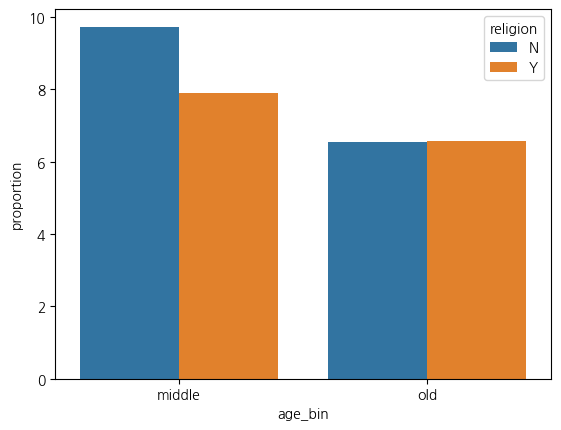

In [108]:
sns.barplot(x='age_bin',y='proportion',hue='religion',data=age_rel_div)
plt.show()

#주제 8 : 지역별 연령대 비율

1. 사용 변수 : 지역(region), 연령대(age_bin)
2. 변수 검토 및 전처리 : 자료형 확인, 이상치 및 결측치 확인 (ex. 9999,9,NaN)
3. 코드북 지역코드 이용하여 지역 변수 변환 및 병합
4. 지역을 기준으로 그룹화하여 지역별 연령대 비율 확인
5. 비율표, 수평 막대 그래프, 수평 누적 막대 그래프
6. old의 비율이 높은 순(내림차순) 정렬하여 그리기


##데이터 확인

In [109]:
wf

,sex,birth_year,marital_status,religion,job_code,income,region,age,age_bin,job,divorce_status
0,female,1936.0,2.0,N,NaN,NaN,1,80.0,old,NaN,NaN
1,female,1945.0,2.0,N,NaN,NaN,1,71.0,old,NaN,NaN
2,male,1948.0,2.0,N,942.0,120.0,1,68.0,old,경비원 및 검표원,NaN
3,male,1942.0,3.0,Y,762.0,200.0,1,74.0,old,전기공,divorce
4,female,1923.0,2.0,Y,NaN,NaN,1,93.0,old,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16665,female,NaN,5.0,Y,NaN,NaN,6,NaN,NaN,NaN,NaN
16666,male,1972.0,NaN,Y,NaN,NaN,6,44.0,middle,NaN,NaN
16667,female,1969.0,1.0,NaN,NaN,NaN,2,47.0,middle,NaN,marriage
16668,female,1960.0,3.0,N,9999.0,NaN,6,56.0,middle,NaN,divorce


In [110]:
wf['region'].info()

<class 'pandas.core.series.Series'>
Int64Index: 16670 entries, 0 to 16669
Series name: region
Non-Null Count  Dtype
--------------  -----
16670 non-null  int64
dtypes: int64(1)
memory usage: 260.5 KB


In [111]:
wf['region'].value_counts(dropna=False)

2    3712
7    2922
3    2785
1    2487
4    2036
5    1468
6    1260
Name: region, dtype: int64

In [112]:
wf['region'].isnull().sum()

0

In [113]:
region_code = pd.DataFrame({'region':[1,2,3,4,5,6,7],
                             'region_name':['서울','수도권(인천/경기)','부산/경남/울산','대구/경북','대전/충남','강원/충북','광주/전남/전북/제주도']})
region_code

,region,region_name
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [114]:
wf=pd.merge(wf,region_code,how='left',on='region')

In [115]:
wf

,sex,birth_year,marital_status,religion,job_code,income,region,age,age_bin,job,divorce_status,region_name
0,female,1936.0,2.0,N,NaN,NaN,1,80.0,old,NaN,NaN,서울
1,female,1945.0,2.0,N,NaN,NaN,1,71.0,old,NaN,NaN,서울
2,male,1948.0,2.0,N,942.0,120.0,1,68.0,old,경비원 및 검표원,NaN,서울
3,male,1942.0,3.0,Y,762.0,200.0,1,74.0,old,전기공,divorce,서울
4,female,1923.0,2.0,Y,NaN,NaN,1,93.0,old,NaN,NaN,서울
...,...,...,...,...,...,...,...,...,...,...,...,...
16665,female,NaN,5.0,Y,NaN,NaN,6,NaN,NaN,NaN,NaN,강원/충북
16666,male,1972.0,NaN,Y,NaN,NaN,6,44.0,middle,NaN,NaN,강원/충북
16667,female,1969.0,1.0,NaN,NaN,NaN,2,47.0,middle,NaN,marriage,수도권(인천/경기)
16668,female,1960.0,3.0,N,9999.0,NaN,6,56.0,middle,NaN,divorce,강원/충북


##데이터 분석

In [116]:
wf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16670 entries, 0 to 16669
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             16669 non-null  object 
 1   birth_year      16669 non-null  float64
 2   marital_status  16669 non-null  float64
 3   religion        16669 non-null  object 
 4   job_code        7530 non-null   float64
 5   income          4620 non-null   float64
 6   region          16670 non-null  int64  
 7   age             16669 non-null  float64
 8   age_bin         16669 non-null  object 
 9   job             7529 non-null   object 
 10  divorce_status  9146 non-null   object 
 11  region_name     16670 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.7+ MB


In [117]:
wf.dropna(subset=['age_bin'])\
  .groupby(['region_name'],as_index=False)['age_bin']\
  .value_counts()

,region_name,age_bin,count
0,강원/충북,old,555
1,강원/충북,middle,419
2,강원/충북,young,285
3,광주/전남/전북/제주도,old,1233
4,광주/전남/전북/제주도,middle,947
5,광주/전남/전북/제주도,young,742
6,대구/경북,old,928
7,대구/경북,middle,637
8,대구/경북,young,471
9,대전/충남,middle,548


In [118]:
rg_age=wf.dropna(subset=['age_bin'])\
         .groupby(['region_name'],as_index=False)['age_bin']\
         .value_counts(normalize=True)

rg_age

,region_name,age_bin,proportion
0,강원/충북,old,0.440826
1,강원/충북,middle,0.332804
2,강원/충북,young,0.226370
3,광주/전남/전북/제주도,old,0.421971
4,광주/전남/전북/제주도,middle,0.324093
5,광주/전남/전북/제주도,young,0.253936
6,대구/경북,old,0.455796
7,대구/경북,middle,0.312868
8,대구/경북,young,0.231336
9,대전/충남,middle,0.373297


In [119]:
rg_age = rg_age.assign(proportion=rg_age['proportion']*100).round(2)

rg_age

,region_name,age_bin,proportion
0,강원/충북,old,44.08
1,강원/충북,middle,33.28
2,강원/충북,young,22.64
3,광주/전남/전북/제주도,old,42.20
4,광주/전남/전북/제주도,middle,32.41
5,광주/전남/전북/제주도,young,25.39
6,대구/경북,old,45.58
7,대구/경북,middle,31.29
8,대구/경북,young,23.13
9,대전/충남,middle,37.33


In [120]:
rg_age_pivot=rg_age.pivot(index='region_name',columns='age_bin',values='proportion')
rg_age_pivot

age_bin,middle,old,young
region_name,,,
강원/충북,33.28,44.08,22.64
광주/전남/전북/제주도,32.41,42.20,25.39
대구/경북,31.29,45.58,23.13
대전/충남,37.33,35.97,26.70
부산/경남/울산,35.33,40.36,24.31
서울,41.42,32.41,26.18
수도권(인천/경기),40.06,29.88,30.06


##분석 결과

In [127]:
rg_age_sort=rg_age[rg_age['age_bin']=='old'].sort_values(by='proportion',ascending=False)
rg_age_sort

,region_name,age_bin,proportion
6,대구/경북,old,45.58
0,강원/충북,old,44.08
3,광주/전남/전북/제주도,old,42.20
12,부산/경남/울산,old,40.36
10,대전/충남,old,35.97
16,서울,old,32.41
20,수도권(인천/경기),old,29.88


In [129]:
order_list=rg_age_sort

In [167]:
# old 를 내림 차순 정렬 => 오름 차순 정렬 + 축 전환
pivot_sort=rg_age_pivot.sort_values('old')[['young','middle','old']]
pivot_sort

age_bin,young,middle,old
region_name,,,
수도권(인천/경기),30.06,40.06,29.88
서울,26.18,41.42,32.41
대전/충남,26.70,37.33,35.97
부산/경남/울산,24.31,35.33,40.36
광주/전남/전북/제주도,25.39,32.41,42.20
강원/충북,22.64,33.28,44.08
대구/경북,23.13,31.29,45.58


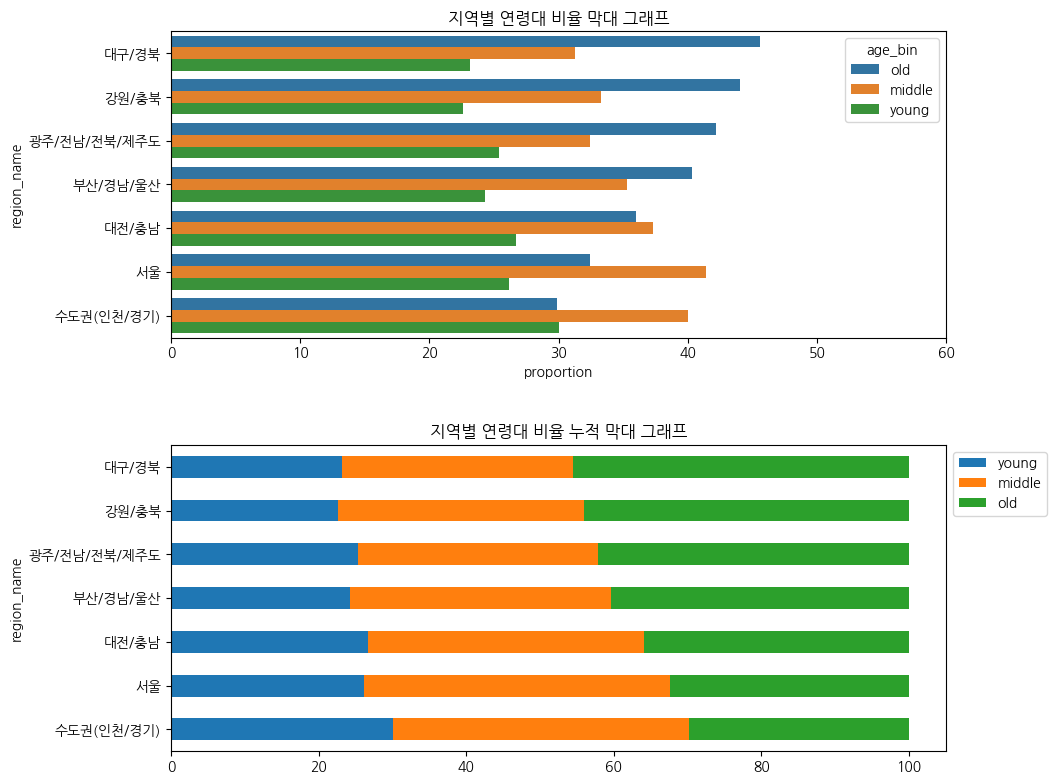

In [168]:
fig=plt.figure(figsize=(10,9))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sns.barplot(x='proportion',y='region_name',hue='age_bin',order=order_list,data=rg_age,ax=ax1)\
            .set(xlim=(0,60),title='지역별 연령대 비율 막대 그래프')

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

pivot_sort.plot.barh(stacked=True,ax=ax2).set(title='지역별 연령대 비율 누적 막대 그래프')
plt.legend(bbox_to_anchor=(1,1))
plt.show()